In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import itertools
import scipy.stats
import seaborn as sns

In [2]:
## norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/full_data_converted.csv') ## Converting to h5ad
#norm_data = norm_data.T
#norm_data.write_h5ad('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/faster_reading_full_data.h5ad')
norm_data = sc.read_h5ad('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/faster_reading_full_data.h5ad')

In [3]:
norm_data

AnnData object with n_obs × n_vars = 47536 × 60708

In [4]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Meta_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname_Sept2022.csv',index_col = 0)
cell_identity

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Annotation,type
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13445,3280,6,6,Maize,Cortex_4,Cell
Maize_Cell1_AAACCTGAGTGATCGG,Maize_Cell_1,11556,3579,14008,3580,7,7,Maize,Stele_2,Cell
Maize_Cell1_AAACCTGCACTGTCGG,Maize_Cell_1,19725,4690,15803,4688,1,1,Maize,Cortex_1,Cell
Maize_Cell1_AAACCTGGTGTGAAAT,Maize_Cell_1,17272,4355,15469,4354,6,6,Maize,Cortex_4,Cell
Maize_Cell1_AAACCTGTCTCAAGTG,Maize_Cell_1,11246,3548,13956,3546,14,14,Maize,Epidermis_2,Cell
...,...,...,...,...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Set_Cells_3,9192,2954,21040,3212,14,14,Setaria,Epidermis_2,Cell
Set_Cells_3_TTTGTTGAGGCTCACC,Set_Cells_3,27048,4655,23549,4654,16,16,Setaria,Trichoblast,Cell
Set_Cells_3_TTTGTTGCAACCAGAG,Set_Cells_3,21855,5009,22238,5009,17,17,Setaria,Phloem,Cell
Set_Cells_3_TTTGTTGCAGTCTACA,Set_Cells_3,9015,2669,20346,3006,3,3,Setaria,LRC,Cell


In [5]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']


In [6]:
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'


In [7]:
norm_data.obs.value_counts('Species')

Species
Millet     26622
Sorghum    13299
Maize       7615
dtype: int64

In [8]:
norm_data['Maize_Cell1_AAACCTGAGAGCTTCT'].X[:,4000]

ArrayView([0.], dtype=float32)

In [9]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'

In [10]:
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'

In [11]:
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs

/tmp/ipykernel_1604711/980905806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_4,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell
Maize_Cell1_AAACCTGAGTGATCGG,Stele_2,Maize,Stele_2 Cell,Stele_2 Cell Maize,Cell
Maize_Cell1_AAACCTGCACTGTCGG,Cortex_1,Maize,Cortex_1 Cell,Cortex_1 Cell Maize,Cell
Maize_Cell1_AAACCTGGTGTGAAAT,Cortex_4,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell
Maize_Cell1_AAACCTGTCTCAAGTG,Epidermis_2,Maize,Epidermis_2 Cell,Epidermis_2 Cell Maize,Cell
...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Epidermis_2,Millet,Epidermis_2 Cell,Epidermis_2 Cell Millet,Cell
Set_Cells_3_TTTGTTGAGGCTCACC,Trichoblast,Millet,Trichoblast Cell,Trichoblast Cell Millet,Cell
Set_Cells_3_TTTGTTGCAACCAGAG,Phloem,Millet,Phloem Cell,Phloem Cell Millet,Cell
Set_Cells_3_TTTGTTGCAGTCTACA,LRC,Millet,LRC Cell,LRC Cell Millet,Cell


In [12]:
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

In [13]:
norm_data.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_4,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAACCTGAGTGATCGG,Stele_2,Maize,Stele_2 Cell,Stele_2 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAACCTGCACTGTCGG,Cortex_1,Maize,Cortex_1 Cell,Cortex_1 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAACCTGGTGTGAAAT,Cortex_4,Maize,Cortex_4 Cell,Cortex_4 Cell Maize,Cell,Maize Cell
Maize_Cell1_AAACCTGTCTCAAGTG,Epidermis_2,Maize,Epidermis_2 Cell,Epidermis_2 Cell Maize,Cell,Maize Cell
...,...,...,...,...,...,...
Set_Cells_3_TTTGGTTTCTGGGTCG,Epidermis_2,Millet,Epidermis_2 Cell,Epidermis_2 Cell Millet,Cell,Millet Cell
Set_Cells_3_TTTGTTGAGGCTCACC,Trichoblast,Millet,Trichoblast Cell,Trichoblast Cell Millet,Cell,Millet Cell
Set_Cells_3_TTTGTTGCAACCAGAG,Phloem,Millet,Phloem Cell,Phloem Cell Millet,Cell,Millet Cell
Set_Cells_3_TTTGTTGCAGTCTACA,LRC,Millet,LRC Cell,LRC Cell Millet,Cell,Millet Cell


In [14]:
fully_seperated_data = norm_data.copy()

In [15]:
# pymn.variableGenes(norm_data,study_col = 'Species')
# pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
# g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
#g.savefig('/data/passala/Plots_for_projects/Bruno_Ken_cross_species_single_cell/updated_metaneighbor_with_post_revision_data.svg')

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


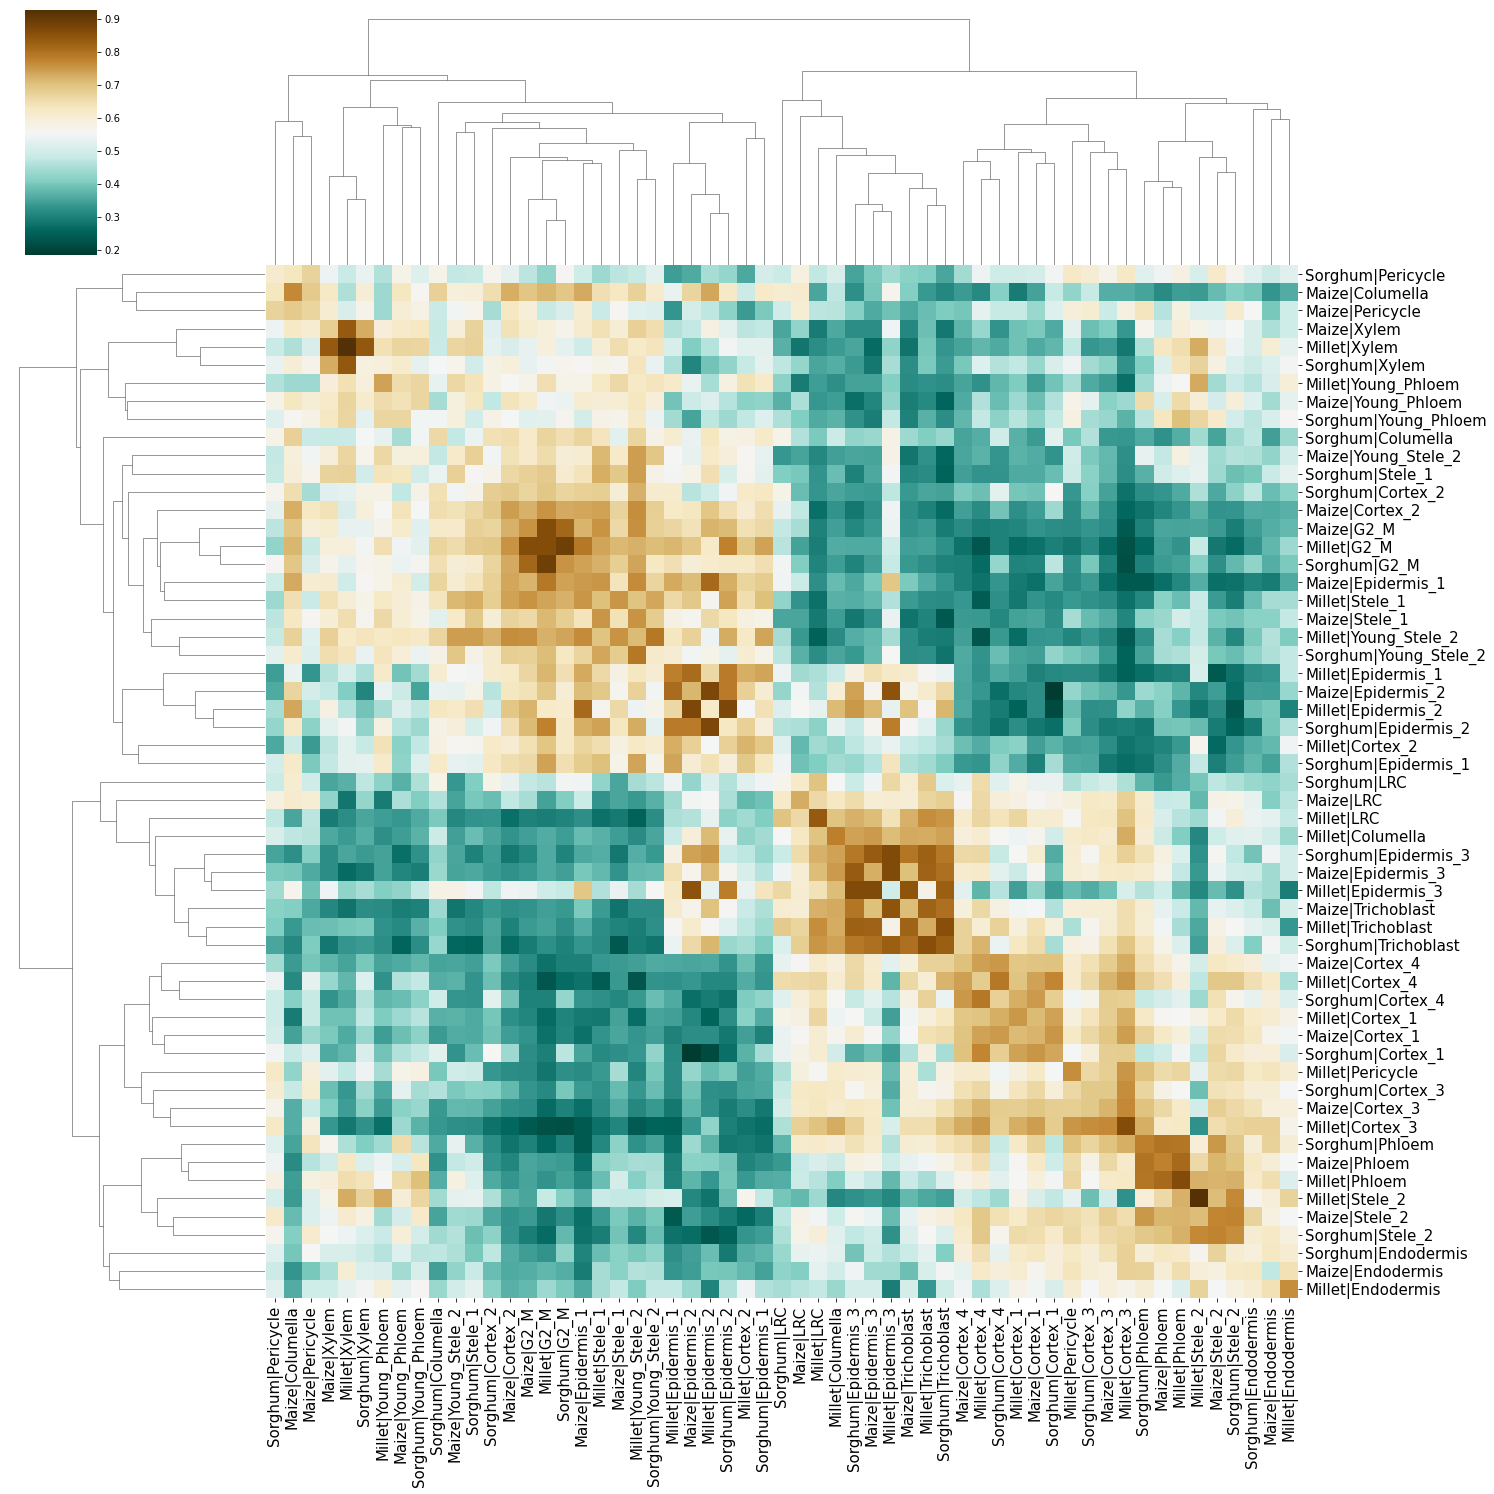

In [16]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation', compute_p= True)
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
#g.savefig('/data/passala/Plots_for_projects/Bruno_Ken_cross_species_single_cell/updated_metaneighbor_with_post_revision_data.svg')

In [17]:
norm_data.var.sum()

highly_variable    4898
dtype: int64

In [24]:
norm_data.uns['MetaNeighborUS']

,Maize|Columella,Maize|Cortex_1,Maize|Cortex_2,Maize|Cortex_3,Maize|Cortex_4,Maize|Endodermis,Maize|Epidermis_1,Maize|Epidermis_2,Maize|Epidermis_3,Maize|G2_M,...,Sorghum|G2_M,Sorghum|LRC,Sorghum|Pericycle,Sorghum|Phloem,Sorghum|Stele_1,Sorghum|Stele_2,Sorghum|Trichoblast,Sorghum|Xylem,Sorghum|Young_Phloem,Sorghum|Young_Stele_2
Maize|Columella,0.767832,0.347284,0.725404,0.365723,0.338457,0.329995,0.730662,0.665383,0.395622,0.694947,...,0.692924,0.609113,0.632145,0.348753,0.597221,0.412480,0.309696,0.600607,0.563027,0.614811
Maize|Cortex_1,0.347284,0.717602,0.340966,0.695341,0.697097,0.565011,0.275142,0.317689,0.562589,0.327598,...,0.307994,0.537029,0.504573,0.672994,0.358602,0.650349,0.650587,0.431993,0.418561,0.343915
Maize|Cortex_2,0.725404,0.340966,0.744109,0.324476,0.345249,0.357553,0.733792,0.631291,0.324707,0.720136,...,0.730008,0.534307,0.527728,0.279110,0.660015,0.331034,0.266758,0.590733,0.552614,0.678884
Maize|Cortex_3,0.365723,0.695341,0.324476,0.718788,0.684306,0.591243,0.270503,0.373714,0.620817,0.317422,...,0.300941,0.501675,0.569766,0.701837,0.376923,0.657000,0.642615,0.417265,0.430547,0.335754
Maize|Cortex_4,0.338457,0.697097,0.345249,0.684306,0.704124,0.532773,0.298086,0.353601,0.610262,0.316025,...,0.296780,0.530002,0.442848,0.648690,0.345006,0.614140,0.673640,0.400818,0.375608,0.358541
Maize|Endodermis,0.329995,0.565011,0.357553,0.591243,0.532773,0.475574,0.291954,0.341670,0.441031,0.364530,...,0.364037,0.422143,0.488960,0.672919,0.483640,0.625391,0.551283,0.513177,0.507580,0.455215
Maize|Epidermis_1,0.730662,0.275142,0.733792,0.270503,0.298086,0.291954,0.748481,0.706262,0.399750,0.718033,...,0.738150,0.543855,0.491879,0.236278,0.638160,0.278770,0.331027,0.559559,0.501375,0.665625
Maize|Epidermis_2,0.665383,0.317689,0.631291,0.373714,0.353601,0.341670,0.706262,0.714357,0.568978,0.641366,...,0.599956,0.428820,0.359120,0.437433,0.574766,0.270075,0.657033,0.306934,0.351163,0.547692
Maize|Epidermis_3,0.395622,0.562589,0.324707,0.620817,0.610262,0.441031,0.399750,0.568978,0.723844,0.334636,...,0.343696,0.545403,0.401404,0.614891,0.357401,0.494710,0.801429,0.286507,0.295723,0.381175
Maize|G2_M,0.694947,0.327598,0.720136,0.317422,0.316025,0.364530,0.718033,0.641366,0.334636,0.755715,...,0.816575,0.479165,0.469426,0.301557,0.675109,0.295140,0.292963,0.530411,0.522411,0.676531


In [23]:
ordering = norm_data.uns['MetaNeighborUS'].iloc[g.dendrogram_row.reordered_ind].index.to_series().reset_index(drop = True)

In [27]:
base_data = norm_data.uns['MetaNeighborUS'].reindex(ordering)[ordering]

In [ ]:
base_data.to_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Tables_to_send_to_bruno/base_data_for_supp_fig_6a_heatmap.csv')

In [20]:
g.dendrogram_row.reordered_ind

[49,
 0,
 11,
 16,
 35,
 54,
 36,
 17,
 55,
 38,
 18,
 51,
 40,
 2,
 9,
 28,
 47,
 6,
 32,
 13,
 37,
 56,
 25,
 7,
 26,
 45,
 21,
 44,
 48,
 10,
 29,
 19,
 46,
 8,
 27,
 15,
 34,
 53,
 4,
 23,
 42,
 20,
 1,
 39,
 30,
 41,
 3,
 22,
 50,
 12,
 31,
 33,
 14,
 52,
 43,
 5,
 24]

In [19]:
norm_data.uns['MetaNeighborUS']

,Maize|Columella,Maize|Cortex_1,Maize|Cortex_2,Maize|Cortex_3,Maize|Cortex_4,Maize|Endodermis,Maize|Epidermis_1,Maize|Epidermis_2,Maize|Epidermis_3,Maize|G2_M,...,Sorghum|G2_M,Sorghum|LRC,Sorghum|Pericycle,Sorghum|Phloem,Sorghum|Stele_1,Sorghum|Stele_2,Sorghum|Trichoblast,Sorghum|Xylem,Sorghum|Young_Phloem,Sorghum|Young_Stele_2
Maize|Columella,0.767832,0.347284,0.725404,0.365723,0.338457,0.329995,0.730662,0.665383,0.395622,0.694947,...,0.692924,0.609113,0.632145,0.348753,0.597221,0.412480,0.309696,0.600607,0.563027,0.614811
Maize|Cortex_1,0.347284,0.717602,0.340966,0.695341,0.697097,0.565011,0.275142,0.317689,0.562589,0.327598,...,0.307994,0.537029,0.504573,0.672994,0.358602,0.650349,0.650587,0.431993,0.418561,0.343915
Maize|Cortex_2,0.725404,0.340966,0.744109,0.324476,0.345249,0.357553,0.733792,0.631291,0.324707,0.720136,...,0.730008,0.534307,0.527728,0.279110,0.660015,0.331034,0.266758,0.590733,0.552614,0.678884
Maize|Cortex_3,0.365723,0.695341,0.324476,0.718788,0.684306,0.591243,0.270503,0.373714,0.620817,0.317422,...,0.300941,0.501675,0.569766,0.701837,0.376923,0.657000,0.642615,0.417265,0.430547,0.335754
Maize|Cortex_4,0.338457,0.697097,0.345249,0.684306,0.704124,0.532773,0.298086,0.353601,0.610262,0.316025,...,0.296780,0.530002,0.442848,0.648690,0.345006,0.614140,0.673640,0.400818,0.375608,0.358541
Maize|Endodermis,0.329995,0.565011,0.357553,0.591243,0.532773,0.475574,0.291954,0.341670,0.441031,0.364530,...,0.364037,0.422143,0.488960,0.672919,0.483640,0.625391,0.551283,0.513177,0.507580,0.455215
Maize|Epidermis_1,0.730662,0.275142,0.733792,0.270503,0.298086,0.291954,0.748481,0.706262,0.399750,0.718033,...,0.738150,0.543855,0.491879,0.236278,0.638160,0.278770,0.331027,0.559559,0.501375,0.665625
Maize|Epidermis_2,0.665383,0.317689,0.631291,0.373714,0.353601,0.341670,0.706262,0.714357,0.568978,0.641366,...,0.599956,0.428820,0.359120,0.437433,0.574766,0.270075,0.657033,0.306934,0.351163,0.547692
Maize|Epidermis_3,0.395622,0.562589,0.324707,0.620817,0.610262,0.441031,0.399750,0.568978,0.723844,0.334636,...,0.343696,0.545403,0.401404,0.614891,0.357401,0.494710,0.801429,0.286507,0.295723,0.381175
Maize|G2_M,0.694947,0.327598,0.720136,0.317422,0.316025,0.364530,0.718033,0.641366,0.334636,0.755715,...,0.816575,0.479165,0.469426,0.301557,0.675109,0.295140,0.292963,0.530411,0.522411,0.676531


In [18]:
meta_neightbor_as_panda = norm_data.uns['MetaNeighborUS']
meta_neightbor_as_panda = meta_neightbor_as_panda.where(np.triu(np.ones(meta_neightbor_as_panda.shape)).astype(bool))
meta_neightbor_as_panda = meta_neightbor_as_panda.stack().reset_index()
meta_neightbor_as_panda.columns = ['Cluster 1','Cluster 2','AUROC Between Clusters']
meta_neightbor_as_panda

KeyError: 'MetaNeighborUS'

In [51]:
#meta_neightbor_as_panda.to_csv('/data/passala/Generated_Tables/Temp_junk/bruno_metaneighbor_as_csv_for_correlation_post_review_version.csv')
meta_neightbor_as_panda = pd.read_csv('/data/passala/Generated_Tables/Temp_junk/bruno_metaneighbor_as_csv_for_correlation_post_review_version.csv', index_col= 0)

In [52]:
meta_neightbor_as_panda

,Cluster 1,Cluster 2,AUROC Between Clusters
0,Maize|Columella,Maize|Columella,0.767832
1,Maize|Columella,Maize|Cortex_1,0.347284
2,Maize|Columella,Maize|Cortex_2,0.725404
3,Maize|Columella,Maize|Cortex_3,0.365723
4,Maize|Columella,Maize|Cortex_4,0.338457
...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971


In [53]:
meta_neightbor_as_panda.values.tolist()
combinations_listed_for_metaneighbor_p_values = list(itertools.combinations(meta_neightbor_as_panda.values.tolist(),2))

big_list_of_combinations_flattened = []

for inner_list in combinations_listed_for_metaneighbor_p_values:
    flattened_list = [item for sublist in inner_list for item in sublist]
    big_list_of_combinations_flattened.append(flattened_list)
all_combinations_of_clusters_to_generate_p_values_between = pd.DataFrame(data = big_list_of_combinations_flattened, columns = ['Pair 1 Cluster 1','Pair 1 Cluster 2', 'Pair 1 AUROC','Pair 2 Cluster 1','Pair 2 Cluster 2', 'Pair 2 AUROC'])
all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995
...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315


In [54]:
norm_data.obs['Formatted Pair ID'] = norm_data.obs['Species']+'|' +norm_data.obs['Cell Cluster Annotation']
panda_of_cluster_cell_size = pd.DataFrame(data = norm_data.obs['Formatted Pair ID'].value_counts().values, columns = ['Pair 1 Cluster 1 Size'], index = norm_data.obs['Formatted Pair ID'].value_counts().index )
panda_of_cluster_cell_size


,Pair 1 Cluster 1 Size
Millet|Stele_1,2643
Millet|Cortex_1,2391
Millet|Cortex_3,2255
Millet|LRC,2248
Millet|Epidermis_1,1867
Millet|Cortex_4,1835
Millet|Cortex_2,1831
Sorghum|Stele_1,1729
Sorghum|Cortex_1,1438
Millet|Young_Phloem,1389


In [55]:
all_auroc_with_cluster_size = meta_neightbor_as_panda.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Cluster 1', right_index= True)
all_auroc_with_cluster_size.rename(columns ={'Pair 1 Cluster 1 Size':'Cluster 1 Size'}, inplace = True)
all_auroc_with_cluster_size = all_auroc_with_cluster_size.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Cluster 2', right_index= True)
all_auroc_with_cluster_size.rename(columns ={'Pair 1 Cluster 1 Size':'Cluster 2 Size'}, inplace = True)
all_auroc_with_cluster_size


,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size
0,Maize|Columella,Maize|Columella,0.767832,172,172
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452
...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750


In [56]:
all_auroc_with_cluster_size['Max Cluster Size'] = all_auroc_with_cluster_size[['Cluster 1 Size','Cluster 2 Size']].max(axis=1)
all_auroc_with_cluster_size

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size
0,Maize|Columella,Maize|Columella,0.767832,172,172,172
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,683
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,443
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,269
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,452
...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,838
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,750
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,838
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,838


In [57]:
total_number_of_cells = len(norm_data.obs)
total_number_of_cells

47536

In [58]:
all_auroc_with_cluster_size['Non-Cluster Cells'] = total_number_of_cells-all_auroc_with_cluster_size['Max Cluster Size']
all_auroc_with_cluster_size['N1*N2'] = all_auroc_with_cluster_size['Max Cluster Size']*all_auroc_with_cluster_size['Non-Cluster Cells']
all_auroc_with_cluster_size['Worst Case SD'] = ((all_auroc_with_cluster_size['N1*N2']*(total_number_of_cells+1))/12)**0.5

In [59]:
all_auroc_with_cluster_size

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD
0,Maize|Columella,Maize|Columella,0.767832,172,172,172,47364,8146608,179644.395148
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,683,46853,32000599,356044.528426
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,443,47093,20862199,287478.456274
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,269,47267,12714823,224429.747908
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,452,47084,21281968,290356.234193
...,...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,838,46698,39132924,393728.100787
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,750,46786,35089500,372832.576534
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,838,46698,39132924,393728.100787
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,838,46698,39132924,393728.100787


In [60]:
all_auroc_with_cluster_size['U Statistic'] =all_auroc_with_cluster_size['AUROC Between Clusters']*all_auroc_with_cluster_size['N1*N2']
all_auroc_with_cluster_size

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic
0,Maize|Columella,Maize|Columella,0.767832,172,172,172,47364,8146608,179644.395148,6.255230e+06
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,683,46853,32000599,356044.528426,1.111331e+07
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,443,47093,20862199,287478.456274,1.513353e+07
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,269,47267,12714823,224429.747908,4.650102e+06
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,452,47084,21281968,290356.234193,7.203039e+06
...,...,...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,838,46698,39132924,393728.100787,2.065621e+07
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,750,46786,35089500,372832.576534,1.879393e+07
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,838,46698,39132924,393728.100787,2.147689e+07
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,838,46698,39132924,393728.100787,2.105238e+07


In [61]:
all_auroc_with_cluster_size['Min U'] = all_auroc_with_cluster_size['U Statistic'] - all_auroc_with_cluster_size['Worst Case SD']
all_auroc_with_cluster_size['Max U'] = all_auroc_with_cluster_size['U Statistic'] + all_auroc_with_cluster_size['Worst Case SD']
all_auroc_with_cluster_size

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U
0,Maize|Columella,Maize|Columella,0.767832,172,172,172,47364,8146608,179644.395148,6.255230e+06,6.075585e+06,6.434874e+06
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,683,46853,32000599,356044.528426,1.111331e+07,1.075727e+07,1.146936e+07
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,443,47093,20862199,287478.456274,1.513353e+07,1.484605e+07,1.542101e+07
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,269,47267,12714823,224429.747908,4.650102e+06,4.425672e+06,4.874532e+06
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,452,47084,21281968,290356.234193,7.203039e+06,6.912683e+06,7.493395e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,838,46698,39132924,393728.100787,2.065621e+07,2.026248e+07,2.104994e+07
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,750,46786,35089500,372832.576534,1.879393e+07,1.842110e+07,1.916677e+07
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,838,46698,39132924,393728.100787,2.147689e+07,2.108316e+07,2.187062e+07
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,838,46698,39132924,393728.100787,2.105238e+07,2.065865e+07,2.144611e+07


In [62]:
all_auroc_with_cluster_size['Min AUROC'] = all_auroc_with_cluster_size['Min U']/all_auroc_with_cluster_size['N1*N2']
all_auroc_with_cluster_size['Max AUROC'] = all_auroc_with_cluster_size['Max U']/all_auroc_with_cluster_size['N1*N2']
all_auroc_with_cluster_size['Error Bar Total Size'] = all_auroc_with_cluster_size['Max AUROC'] - all_auroc_with_cluster_size['Min AUROC']


In [63]:
all_auroc_with_cluster_size['Error'] = all_auroc_with_cluster_size['Error Bar Total Size']/2

In [29]:
all_auroc_with_cluster_size

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size,Error
0,Maize|Columella,Maize|Columella,0.767832,172,172,172,47364,8146608,179644.395148,6.255230e+06,6.075585e+06,6.434874e+06,0.745781,0.789884,0.044103,0.022051
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,683,46853,32000599,356044.528426,1.111331e+07,1.075727e+07,1.146936e+07,0.336158,0.358411,0.022252,0.011126
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,443,47093,20862199,287478.456274,1.513353e+07,1.484605e+07,1.542101e+07,0.711624,0.739184,0.027560,0.013780
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,269,47267,12714823,224429.747908,4.650102e+06,4.425672e+06,4.874532e+06,0.348072,0.383374,0.035302,0.017651
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,452,47084,21281968,290356.234193,7.203039e+06,6.912683e+06,7.493395e+06,0.324814,0.352101,0.027287,0.013643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,838,46698,39132924,393728.100787,2.065621e+07,2.026248e+07,2.104994e+07,0.517786,0.537909,0.020123,0.010061
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,750,46786,35089500,372832.576534,1.879393e+07,1.842110e+07,1.916677e+07,0.524975,0.546225,0.021250,0.010625
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,838,46698,39132924,393728.100787,2.147689e+07,2.108316e+07,2.187062e+07,0.538758,0.558880,0.020123,0.010061
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,838,46698,39132924,393728.100787,2.105238e+07,2.065865e+07,2.144611e+07,0.527910,0.548032,0.020123,0.010061


In [30]:
all_auroc_for_bruno = all_auroc_with_cluster_size[['Cluster 1','Cluster 2','AUROC Between Clusters','Cluster 1 Size','Cluster 2 Size','Min AUROC','Max AUROC','Error']]


In [31]:
all_auroc_for_bruno

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Min AUROC,Max AUROC,Error
0,Maize|Columella,Maize|Columella,0.767832,172,172,0.745781,0.789884,0.022051
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,0.336158,0.358411,0.011126
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,0.711624,0.739184,0.013780
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,0.348072,0.383374,0.017651
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,0.324814,0.352101,0.013643
...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,0.517786,0.537909,0.010061
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,0.524975,0.546225,0.010625
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,0.538758,0.558880,0.010061
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,0.527910,0.548032,0.010061


In [65]:
all_auroc_for_bruno_clear_names = all_auroc_for_bruno.rename(columns={'Min AUROC':'Bottom of Error Bar','Max AUROC':'Top of Error Bar'})
all_auroc_for_bruno_clear_names

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Bottom of Error Bar,Top of Error Bar,Error
0,Maize|Columella,Maize|Columella,0.767832,172,172,0.745781,0.789884,0.022051
1,Maize|Columella,Maize|Cortex_1,0.347284,172,683,0.336158,0.358411,0.011126
2,Maize|Columella,Maize|Cortex_2,0.725404,172,443,0.711624,0.739184,0.013780
3,Maize|Columella,Maize|Cortex_3,0.365723,172,269,0.348072,0.383374,0.017651
4,Maize|Columella,Maize|Cortex_4,0.338457,172,452,0.324814,0.352101,0.013643
...,...,...,...,...,...,...,...,...
1648,Sorghum|Xylem,Sorghum|Young_Phloem,0.527847,634,838,0.517786,0.537909,0.010061
1649,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,634,750,0.524975,0.546225,0.010625
1650,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,838,838,0.538758,0.558880,0.010061
1651,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,750,0.527910,0.548032,0.010061


In [ ]:
all_auroc_for_bruno_clear_names.to_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Tables_to_send_to_bruno/AUROC_standard_error_calc_with_clearer_col_names_mannwhitney.csv')

In [32]:
#all_auroc_for_bruno.to_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Tables_to_send_to_bruno/AUROC_standard_error_calc_mannwhitney.csv')

In [33]:
columella = all_auroc_with_cluster_size.loc[(all_auroc_with_cluster_size['Cluster 1'].isin(['Millet|LRC','Maize|LRC'])&(all_auroc_with_cluster_size['Cluster 2'].isin(['Millet|LRC','Sorghum|LRC'])))]
phloem = all_auroc_with_cluster_size.loc[(all_auroc_with_cluster_size['Cluster 1'].isin(['Millet|Young_Phloem','Maize|Young_Phloem'])&(all_auroc_with_cluster_size['Cluster 2'].isin(['Millet|Young_Phloem','Sorghum|Young_Phloem'])))]

In [34]:
phloem = phloem.drop([871,1422])

In [35]:
phloem

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size,Error
852,Maize|Young_Phloem,Millet|Young_Phloem,0.653289,335,1389,1389,46147,64098183,503904.366363,4.187464e+07,4.137073e+07,4.237854e+07,0.645428,0.66115,0.015723,0.007861
1441,Millet|Young_Phloem,Sorghum|Young_Phloem,0.662479,1389,838,1389,46147,64098183,503904.366363,4.246368e+07,4.195977e+07,4.296758e+07,0.654617,0.67034,0.015723,0.007861


In [36]:
columella

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size,Error
544,Maize|LRC,Millet|LRC,0.657188,280,2248,2248,45288,101807424,635060.332743,6.690657e+07,6.627151e+07,6.754163e+07,0.650950,0.663425,0.012476,0.006238
563,Maize|LRC,Sorghum|LRC,0.621221,280,621,621,46915,29134215,339724.542639,1.809878e+07,1.775905e+07,1.843850e+07,0.609560,0.632881,0.023321,0.011661
1247,Millet|LRC,Millet|LRC,0.838845,2248,2248,2248,45288,101807424,635060.332743,8.540068e+07,8.476562e+07,8.603574e+07,0.832607,0.845083,0.012476,0.006238
1266,Millet|LRC,Sorghum|LRC,0.698869,2248,621,2248,45288,101807424,635060.332743,7.115005e+07,7.051499e+07,7.178511e+07,0.692631,0.705107,0.012476,0.006238


In [54]:
columella = columella.drop([610,1275])
columella

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size
591,Maize|Pericycle,Millet|Pericycle,0.595006,262,952,952,46584,44347968,419142.910674,2.638729e+07,2.596815e+07,2.680643e+07,0.585554,0.604457,0.018902
1294,Millet|Pericycle,Sorghum|Pericycle,0.622698,952,820,952,46584,44347968,419142.910674,2.761540e+07,2.719626e+07,2.803455e+07,0.613247,0.632150,0.018902


In [55]:
combined_df = pd.concat([phloem,columella])
combined_df

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size
852,Maize|Young_Phloem,Millet|Young_Phloem,0.653289,335,1389,1389,46147,64098183,503904.366363,4.187464e+07,4.137073e+07,4.237854e+07,0.645428,0.661150,0.015723
1441,Millet|Young_Phloem,Sorghum|Young_Phloem,0.662479,1389,838,1389,46147,64098183,503904.366363,4.246368e+07,4.195977e+07,4.296758e+07,0.654617,0.670340,0.015723
591,Maize|Pericycle,Millet|Pericycle,0.595006,262,952,952,46584,44347968,419142.910674,2.638729e+07,2.596815e+07,2.680643e+07,0.585554,0.604457,0.018902
1294,Millet|Pericycle,Sorghum|Pericycle,0.622698,952,820,952,46584,44347968,419142.910674,2.761540e+07,2.719626e+07,2.803455e+07,0.613247,0.632150,0.018902


In [56]:
combined_df['Cluster Label'] = combined_df['Cluster 1']+ ' to ' + combined_df['Cluster 2']
combined_df

,Cluster 1,Cluster 2,AUROC Between Clusters,Cluster 1 Size,Cluster 2 Size,Max Cluster Size,Non-Cluster Cells,N1*N2,Worst Case SD,U Statistic,Min U,Max U,Min AUROC,Max AUROC,Error Bar Total Size,Cluster Label
852,Maize|Young_Phloem,Millet|Young_Phloem,0.653289,335,1389,1389,46147,64098183,503904.366363,4.187464e+07,4.137073e+07,4.237854e+07,0.645428,0.661150,0.015723,Maize|Young_Phloem to Millet|Young_Phloem
1441,Millet|Young_Phloem,Sorghum|Young_Phloem,0.662479,1389,838,1389,46147,64098183,503904.366363,4.246368e+07,4.195977e+07,4.296758e+07,0.654617,0.670340,0.015723,Millet|Young_Phloem to Sorghum|Young_Phloem
591,Maize|Pericycle,Millet|Pericycle,0.595006,262,952,952,46584,44347968,419142.910674,2.638729e+07,2.596815e+07,2.680643e+07,0.585554,0.604457,0.018902,Maize|Pericycle to Millet|Pericycle
1294,Millet|Pericycle,Sorghum|Pericycle,0.622698,952,820,952,46584,44347968,419142.910674,2.761540e+07,2.719626e+07,2.803455e+07,0.613247,0.632150,0.018902,Millet|Pericycle to Sorghum|Pericycle


In [57]:
combined_df['Error'] = combined_df['Error Bar Total Size']/2

In [58]:
x_pos = np.arange(len(combined_df))


Text(0.5, 1.0, 'Two Sample Tissues with Error Bar')

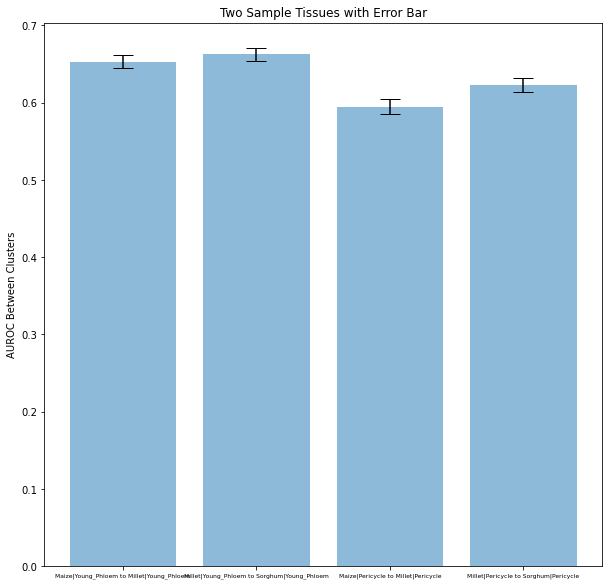

In [60]:
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(x_pos, combined_df['AUROC Between Clusters'], yerr=combined_df['Error'], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('AUROC Between Clusters')
ax.set_xticks(x_pos)
ax.set_xticklabels(combined_df['Cluster Label'], fontsize = 6)
ax.set_title('Two Sample Tissues with Error Bar')

In [38]:
all_auroc_with_cluster_size.min()

Cluster 1                 Maize|Columella
Cluster 2                 Maize|Columella
AUROC Between Clusters           0.183351
Cluster 1 Size                        172
Cluster 2 Size                        172
Max Cluster Size                      172
Non-Cluster Cells                   44893
N1*N2                             8146608
Worst Case SD               179644.395148
U Statistic                3059746.145728
Min U                      2833252.203176
Max U                      3286240.088281
Min AUROC                        0.175621
Max AUROC                        0.191082
Error Bar Total Size             0.011556
dtype: object

In [23]:
all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995
...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315


In [24]:
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 1 Cluster 1', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 1 Cluster 1 Size':'Pair 1 Cluster 2 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 1 Cluster 2', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 1 Cluster 2 Size':'Pair 2 Cluster 1 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 2 Cluster 1', right_index= True)
panda_of_cluster_cell_size.rename(columns ={'Pair 2 Cluster 1 Size':'Pair 2 Cluster 2 Size'}, inplace = True)
all_combinations_of_clusters_to_generate_p_values_between = all_combinations_of_clusters_to_generate_p_values_between.merge(how = 'left', right = panda_of_cluster_cell_size,left_on= 'Pair 2 Cluster 2', right_index= True)
all_combinations_of_clusters_to_generate_p_values_between


,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 1 Cluster 1 Size,Pair 1 Cluster 2 Size,Pair 2 Cluster 1 Size,Pair 2 Cluster 2 Size
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,683
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,443
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,269
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,452
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,384
...,...,...,...,...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,634,750,838,750
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,634,750,750,750
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,838,838,750
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,838,838,750,750


In [25]:
total_number_of_cells = len(norm_data.obs)
total_number_of_cells

47536

In [26]:
all_combinations_of_clusters_to_generate_p_values_between['Minimum Cluster Size Pair 1'] = all_combinations_of_clusters_to_generate_p_values_between[['Pair 1 Cluster 1 Size','Pair 1 Cluster 2 Size']].min(axis = 1)
all_combinations_of_clusters_to_generate_p_values_between['Minimum Cluster Size Pair 2'] = all_combinations_of_clusters_to_generate_p_values_between[['Pair 2 Cluster 1 Size','Pair 2 Cluster 2 Size']].min(axis = 1)

all_combinations_of_clusters_to_generate_p_values_between

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 1 Cluster 1 Size,Pair 1 Cluster 2 Size,Pair 2 Cluster 1 Size,Pair 2 Cluster 2 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,683,172,172
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,443,172,172
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,269,172,172
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,452,172,172
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,384,172,172
...,...,...,...,...,...,...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,634,750,838,750,634,750
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,634,750,750,750,634,750
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,838,838,750,838,750
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,838,838,750,750,838,750


In [27]:
cleaned_clusters_to_generate_p_values = all_combinations_of_clusters_to_generate_p_values_between.drop(columns= ['Pair 1 Cluster 1 Size','Pair 1 Cluster 2 Size','Pair 2 Cluster 2 Size','Pair 2 Cluster 2 Size'])


a1 = cleaned_clusters_to_generate_p_values['Pair 1 AUROC'] ## A1 for hanley mcneil test
ntp1 = cleaned_clusters_to_generate_p_values['Minimum Cluster Size Pair 1']
ntn1 = total_number_of_cells - ntp1


cleaned_clusters_to_generate_p_values['Pair 1 Q1'] = (a1)/(2-a1)
cleaned_clusters_to_generate_p_values['Pair 1 Q2'] = (2*(a1**2))/(1+a1)

pair_1_q1 = cleaned_clusters_to_generate_p_values['Pair 1 Q1']
pair_1_q2 = cleaned_clusters_to_generate_p_values['Pair 1 Q2']

top_term_for_sea1 = (a1*(1-a1))+((ntp1-1)*(pair_1_q1-(a1**2)))+((ntn1 -1)*(pair_1_q2-(a1**2)))
bottom_term_for_sea1 = ntp1*ntn1

cleaned_clusters_to_generate_p_values['Pair 1 SEA'] = (top_term_for_sea1/bottom_term_for_sea1)**(1/2)
cleaned_clusters_to_generate_p_values

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,0.623156,0.666994,0.021234
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,0.623156,0.666994,0.021234
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,0.623156,0.666994,0.021234
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,0.623156,0.666994,0.021234
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,0.623156,0.666994,0.021234
...,...,...,...,...,...,...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,634,750,0.365747,0.373622,0.011770
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,634,750,0.365747,0.373622,0.011770
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,838,750,0.378188,0.388944,0.010313
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,838,750,0.378188,0.388944,0.010313


In [28]:
a2 = cleaned_clusters_to_generate_p_values['Pair 2 AUROC'] ## A1 for hanley mcneil test
ntp2 = cleaned_clusters_to_generate_p_values['Minimum Cluster Size Pair 2']
ntn2 = total_number_of_cells - ntp2


cleaned_clusters_to_generate_p_values['Pair 2 Q1'] = (a2)/(2-a2)
cleaned_clusters_to_generate_p_values['Pair 2 Q2'] = (2*(a2**2))/(1+a2)

pair_2_q1 = cleaned_clusters_to_generate_p_values['Pair 2 Q1']
pair_2_q2 = cleaned_clusters_to_generate_p_values['Pair 2 Q2']

top_term_for_sea2 = (a2*(1-a2))+((ntp2-1)*(pair_2_q1-(a2**2)))+((ntn2 -1)*(pair_2_q2-(a2**2)))
bottom_term_for_sea2 = ntp2*ntn2

cleaned_clusters_to_generate_p_values['Pair 2 SEA'] = (top_term_for_sea2/bottom_term_for_sea2)**(1/2)
cleaned_clusters_to_generate_p_values

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,0.623156,0.666994,0.021234,0.210130,0.179036,0.018483
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,0.623156,0.666994,0.021234,0.569125,0.609957,0.022086
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,0.623156,0.666994,0.021234,0.223783,0.195872,0.019054
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,0.623156,0.666994,0.021234,0.203701,0.171172,0.018195
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,0.623156,0.666994,0.021234,0.197601,0.163755,0.017912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,634,750,0.365747,0.373622,0.011770,0.367962,0.376357,0.010845
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,634,750,0.365747,0.373622,0.011770,0.447508,0.472483,0.011028
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,838,750,0.378188,0.388944,0.010313,0.367962,0.376357,0.010845
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,838,750,0.378188,0.388944,0.010313,0.447508,0.472483,0.011028


In [29]:
sea1_squared = cleaned_clusters_to_generate_p_values['Pair 1 SEA']**2
sea2_squared = cleaned_clusters_to_generate_p_values['Pair 2 SEA']**2
sea_difference_for_hanley = (sea1_squared + sea2_squared)**(1/2)

z_score_between_clusters = (a1 - a2)/sea_difference_for_hanley

cleaned_clusters_to_generate_p_values['Z Score Between AUROCs'] = z_score_between_clusters
cleaned_clusters_to_generate_p_values


,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA,Z Score Between AUROCs
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,0.623156,0.666994,0.021234,0.210130,0.179036,0.018483,14.938956
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,0.623156,0.666994,0.021234,0.569125,0.609957,0.022086,1.384823
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,0.623156,0.666994,0.021234,0.223783,0.195872,0.019054,14.094453
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,0.623156,0.666994,0.021234,0.203701,0.171172,0.018195,15.354944
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,0.623156,0.666994,0.021234,0.197601,0.163755,0.017912,15.761146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365373,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,634,750,0.365747,0.373622,0.011770,0.367962,0.376357,0.010845,-0.148160
1365374,Sorghum|Xylem,Sorghum|Young_Stele_2,0.535600,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,634,750,0.365747,0.373622,0.011770,0.447508,0.472483,0.011028,-5.128344
1365375,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Phloem,Sorghum|Young_Stele_2,0.537971,838,838,750,0.378188,0.388944,0.010313,0.367962,0.376357,0.010845,0.724867
1365376,Sorghum|Young_Phloem,Sorghum|Young_Phloem,0.548819,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.618315,750,838,750,0.378188,0.388944,0.010313,0.447508,0.472483,0.011028,-4.602716


In [30]:
all_p_values = []
for zscore in z_score_between_clusters:
    current_p_value = scipy.stats.norm.sf(abs(zscore))*2
    all_p_values.append(current_p_value)
all_p_values


[1.8383306012941656e-50,
 0.1661066487299041,
 4.108193801583652e-45,
 3.281936130461295e-53,
 5.757923008814872e-56,
 0.22409268814174388,
 0.0009992852443940282,
 1.855465836389519e-37,
 0.018487962730098728,
 4.4732846326620637e-07,
 0.008229368675197201,
 2.3378633532927905e-61,
 6.9394268254554e-06,
 8.453038850723279e-41,
 4.334189238893179e-34,
 6.722863345337278e-06,
 1.1917604889774767e-05,
 1.1404529762988726e-08,
 1.158683094326179e-22,
 1.1694010861772487e-69,
 6.713552302925643e-20,
 3.388641142054239e-45,
 5.2634807041392896e-62,
 3.0073386493023085e-46,
 8.941621482545763e-14,
 0.2449938235905914,
 1.4132116268772724e-10,
 0.08667811038730057,
 8.100272089083246e-49,
 1.0903644230544874e-30,
 2.6076802250633243e-52,
 9.922116983550988e-05,
 5.821435388167923e-53,
 2.0047675115630616e-54,
 1.1205843713677699e-25,
 1.8443135137419933e-28,
 0.002033597343946377,
 0.0026008072383874085,
 4.0930241928316175e-21,
 0.00012082398043832804,
 2.7711147561799855e-21,
 1.51847828088

In [31]:
cleaned_clusters_to_generate_p_values['P Value For AUROC Comparison'] = all_p_values
cleaned_clusters_to_generate_p_values.head(10)

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Pair 2 Cluster 1 Size,Minimum Cluster Size Pair 1,Minimum Cluster Size Pair 2,Pair 1 Q1,Pair 1 Q2,Pair 1 SEA,Pair 2 Q1,Pair 2 Q2,Pair 2 SEA,Z Score Between AUROCs,P Value For AUROC Comparison
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,172,172,172,0.623156,0.666994,0.021234,0.210130,0.179036,0.018483,14.938956,1.838331e-50
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,172,172,172,0.623156,0.666994,0.021234,0.569125,0.609957,0.022086,1.384823,1.661066e-01
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,172,172,172,0.623156,0.666994,0.021234,0.223783,0.195872,0.019054,14.094453,4.108194e-45
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,172,172,172,0.623156,0.666994,0.021234,0.203701,0.171172,0.018195,15.354944,3.281936e-53
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,172,172,172,0.623156,0.666994,0.021234,0.197601,0.163755,0.017912,15.761146,5.757923e-56
5,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_1,0.730662,172,172,172,0.623156,0.666994,0.021234,0.575625,0.616951,0.021999,1.215717,2.240927e-01
6,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_2,0.665383,172,172,172,0.623156,0.666994,0.021234,0.498557,0.531691,0.022768,3.290728,9.992852e-04
7,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_3,0.395622,172,172,172,0.623156,0.666994,0.021234,0.246589,0.224297,0.019899,12.790387,1.855466e-37
8,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|G2_M,0.694947,172,172,172,0.623156,0.666994,0.021234,0.532505,0.569872,0.022504,2.355698,1.848796e-02
9,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|LRC,0.610112,172,172,172,0.623156,0.666994,0.021234,0.438964,0.462373,0.022923,5.047628,4.473285e-07


In [32]:
final_clusters_to_send_to_bruno = cleaned_clusters_to_generate_p_values.drop(columns = ['Pair 2 Cluster 1 Size','Minimum Cluster Size Pair 1','Minimum Cluster Size Pair 2','Pair 1 Q1','Pair 1 Q2','Pair 1 SEA','Pair 2 Q1','Pair 2 Q2','Pair 2 SEA'])
final_clusters_to_send_to_bruno.head(10)

,Pair 1 Cluster 1,Pair 1 Cluster 2,Pair 1 AUROC,Pair 2 Cluster 1,Pair 2 Cluster 2,Pair 2 AUROC,Z Score Between AUROCs,P Value For AUROC Comparison
0,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_1,0.347284,14.938956,1.838331e-50
1,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_2,0.725404,1.384823,1.661066e-01
2,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_3,0.365723,14.094453,4.108194e-45
3,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Cortex_4,0.338457,15.354944,3.281936e-53
4,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Endodermis,0.329995,15.761146,5.757923e-56
5,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_1,0.730662,1.215717,2.240927e-01
6,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_2,0.665383,3.290728,9.992852e-04
7,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|Epidermis_3,0.395622,12.790387,1.855466e-37
8,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|G2_M,0.694947,2.355698,1.848796e-02
9,Maize|Columella,Maize|Columella,0.767832,Maize|Columella,Maize|LRC,0.610112,5.047628,4.473285e-07


In [33]:
final_clusters_to_send_to_bruno.to_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Tables_to_send_to_bruno/P_value_table_for_pairwsie_comparisons.csv',index = False)


In [ ]:

pymn.MetaNeighborUS(norm_data,
                    study_col='Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(norm_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

In [ ]:
pymn.makeClusterGraph(norm_data,low_threshold= .4)
pymn.plotClusterGraph(norm_data, font_size=9,figsize=(15,15))

In [ ]:
merged_tech = norm_data.uns['MetaNeighborUS']

In [ ]:
merged_tech.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/merged_technology_type_heatmap.csv')

In [ ]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'coolwarm',fontsize = 15,show = False, cbar_pos = (0.02,0.82,0.05,0.17))
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_across_species_seperated_by_type.pdf', dpi = 1000)

In [ ]:
pymn.variableGenes(fully_seperated_data,study_col = 'Type and Species')
pymn.MetaNeighborUS(fully_seperated_data,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(fully_seperated_data,figsize = (25,25),cmap = 'BrBG_r',fontsize = 15,show = False,cbar_pos = (0.02,0.82,0.05,0.17))
#g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/brown_blue_Green_version_all_across_species_seperated_by_type.png',dpi = 1000)
#cbar_pos = (22,5,1,3

In [ ]:
seperated_by_cell_type = fully_seperated_data.uns['MetaNeighborUS']
seperated_by_cell_type

In [ ]:
seperated_by_cell_type.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/seperated_by_tech_type.csv')

In [ ]:
pymn.MetaNeighborUS(fully_seperated_data,
                    study_col='Type and Species',
                    ct_col='Cell Cluster Annotation',
                    fast_version=True,
                    symmetric_output=False,
                    one_vs_best=True)

pymn.plotMetaNeighborUS(fully_seperated_data,
                        cmap='coolwarm',
                        figsize=(10, 10),
                        mn_key='MetaNeighborUS_1v1',
                        xticklabels=True,
                        yticklabels=True,
                        fontsize=7)

In [ ]:
pymn.makeClusterGraph(fully_seperated_data,low_threshold= .5)
pymn.plotClusterGraph(fully_seperated_data, font_size=9,figsize=(15,15))

In [ ]:
# list_of_highly_variable_genes = norm_data.var[norm_data.var['highly_variable']==True].index.tolist()
# list_of_highly_variable_genes_pd = pd.DataFrame(index = list_of_highly_variable_genes)
# list_of_highly_variable_genes_pd.to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/list_of_highly_variable_genes.csv')